Diego Castellanos 20082

Oscar Méndez 20402

# Laboratorio 3: Deep Learning

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb

from skimage.transform import resize
from scipy.ndimage import rotate
import imageio

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

## Ejercicio 1

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1. Análisis Exploratorio

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Primero revisamos que todos los datos sean enteros y no hayan nulos.

In [4]:
print('Tipos de datos:', df.dtypes.unique())
print('Cantidad de NAs:', df.isna().sum().sum())

Tipos de datos: [dtype('int64')]
Cantidad de NAs: 0


Ahora revisamos aleatoriamente unas muestras para ver si las imagenes corresponden a numeros.

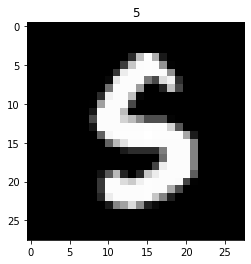

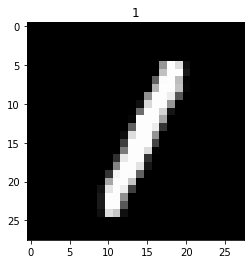

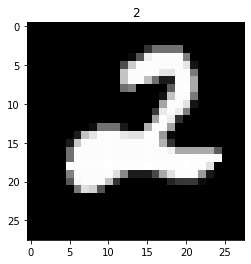

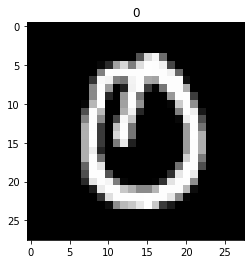

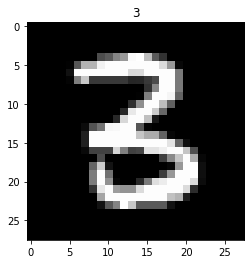

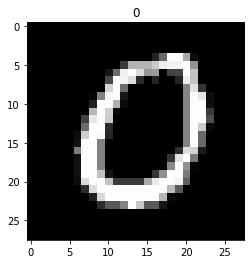

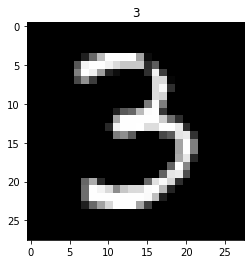

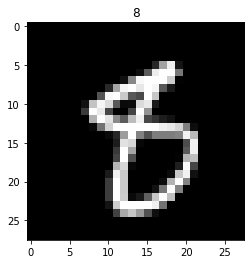

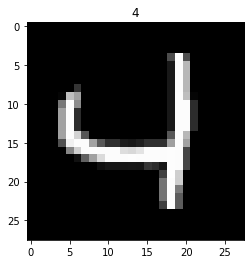

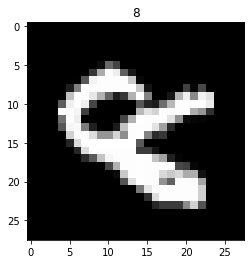

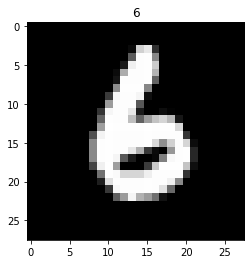

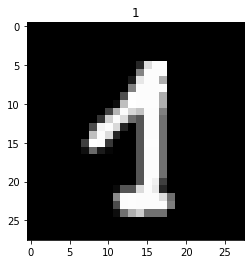

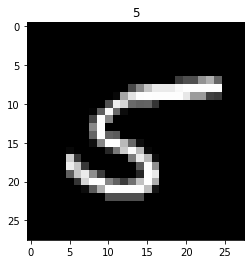

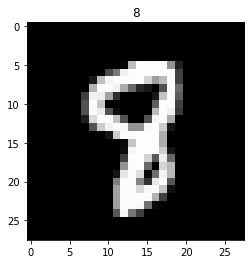

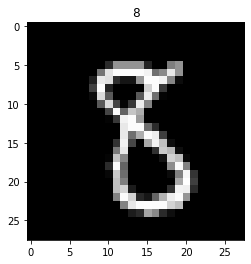

In [5]:
X = df.drop('label', axis=1)
y = df['label']

for i in range(15):
    im = np.random.randint(0, len(df)-1)
    plt.imshow(X.loc[im, :].values.reshape((28, 28)), cmap='gray')
    plt.title(y[im])
    plt.show()

Tambien consideramos necesario revisar cuantas imagenes hay por numero, y ver si todas corresponden a dígitos del 0 al 9.

In [6]:
y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

### 1.2. Redes Neuronales Simples

In [7]:
Y = pd.get_dummies(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [8]:
model_1_2 = Sequential()
model_1_2.add(Dense(84, input_shape=(784,), activation='relu'))
model_1_2.add(Dense(56, activation='relu'))
model_1_2.add(Dense(10, activation='softmax'))

In [9]:
model_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1_2 = model_1_2.fit(X_train, Y_train, epochs=100, validation_split=0.20, batch_size=512, verbose=2)

Epoch 1/100
53/53 - 2s - loss: 11.3854 - accuracy: 0.6551 - val_loss: 2.4900 - val_accuracy: 0.8144 - 2s/epoch - 36ms/step
Epoch 2/100
53/53 - 0s - loss: 1.8544 - accuracy: 0.8453 - val_loss: 1.5144 - val_accuracy: 0.8658 - 420ms/epoch - 8ms/step
Epoch 3/100
53/53 - 0s - loss: 1.1245 - accuracy: 0.8827 - val_loss: 1.1771 - val_accuracy: 0.8766 - 412ms/epoch - 8ms/step
Epoch 4/100
53/53 - 0s - loss: 0.8010 - accuracy: 0.9005 - val_loss: 1.0204 - val_accuracy: 0.8848 - 402ms/epoch - 8ms/step
Epoch 5/100
53/53 - 0s - loss: 0.6020 - accuracy: 0.9153 - val_loss: 0.9136 - val_accuracy: 0.8964 - 390ms/epoch - 7ms/step
Epoch 6/100
53/53 - 0s - loss: 0.4693 - accuracy: 0.9265 - val_loss: 0.8320 - val_accuracy: 0.9043 - 417ms/epoch - 8ms/step
Epoch 7/100
53/53 - 0s - loss: 0.3637 - accuracy: 0.9371 - val_loss: 0.7744 - val_accuracy: 0.9015 - 403ms/epoch - 8ms/step
Epoch 8/100
53/53 - 0s - loss: 0.2984 - accuracy: 0.9452 - val_loss: 0.7308 - val_accuracy: 0.9036 - 392ms/epoch - 7ms/step
Epoch 9/1

Epoch 67/100
53/53 - 0s - loss: 4.5540e-04 - accuracy: 1.0000 - val_loss: 0.6610 - val_accuracy: 0.9329 - 420ms/epoch - 8ms/step
Epoch 68/100
53/53 - 0s - loss: 4.4014e-04 - accuracy: 1.0000 - val_loss: 0.6603 - val_accuracy: 0.9329 - 410ms/epoch - 8ms/step
Epoch 69/100
53/53 - 0s - loss: 4.3087e-04 - accuracy: 1.0000 - val_loss: 0.6618 - val_accuracy: 0.9329 - 407ms/epoch - 8ms/step
Epoch 70/100
53/53 - 0s - loss: 4.1300e-04 - accuracy: 1.0000 - val_loss: 0.6621 - val_accuracy: 0.9332 - 402ms/epoch - 8ms/step
Epoch 71/100
53/53 - 0s - loss: 3.9275e-04 - accuracy: 1.0000 - val_loss: 0.6643 - val_accuracy: 0.9327 - 422ms/epoch - 8ms/step
Epoch 72/100
53/53 - 0s - loss: 3.8022e-04 - accuracy: 1.0000 - val_loss: 0.6654 - val_accuracy: 0.9327 - 392ms/epoch - 7ms/step
Epoch 73/100
53/53 - 0s - loss: 3.6492e-04 - accuracy: 1.0000 - val_loss: 0.6643 - val_accuracy: 0.9326 - 382ms/epoch - 7ms/step
Epoch 74/100
53/53 - 0s - loss: 3.5154e-04 - accuracy: 1.0000 - val_loss: 0.6659 - val_accuracy: 

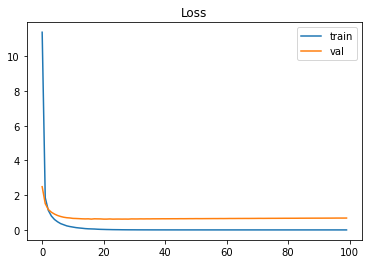

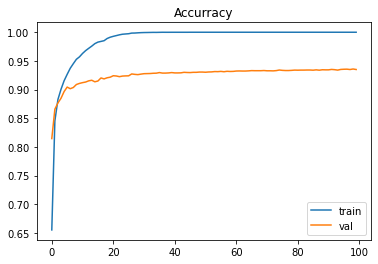

In [10]:
plt.plot(history_1_2.history['loss'], label='train')
plt.plot(history_1_2.history['val_loss'], label='val')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(history_1_2.history['accuracy'], label='train')
plt.plot(history_1_2.history['val_accuracy'], label='val')
plt.title('Accurracy')
plt.legend()
plt.show()

Este modelo mejoro bastante en los primeros 20 epochs, y de ahí fue mejorando poco a poco. Vemos a lo lejos que habia un tendencia muy pequeña de seguir creciendo, por lo que existe la posibilidad de que todavía la podiamos ajusta un poco más. Al final obtuvo un 0.93 de accuracy aproximadamente en el test.

In [11]:
results = np.zeros(3, dtype='float')
results[0] = model_1_2.evaluate(X_test, Y_test, verbose=0)[1]
print('train accuracy:', history_1_2.history['accuracy'][-1])
print('validation accuracy:', history_1_2.history['val_accuracy'][-1])
print('test accuracy:', results[0])

train accuracy: 1.0
validation accuracy: 0.9349702596664429
test accuracy: 0.9277380704879761


### 1.3. Deep Learning

In [12]:
model_1_3 = Sequential()
model_1_3.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
model_1_3.add(MaxPooling2D(pool_size=(2, 2)))
model_1_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1_3.add(MaxPooling2D(pool_size=(2, 2)))
model_1_3.add(Flatten())
model_1_3.add(Dense(128, activation='relu'))
model_1_3.add(Dense(10, activation='softmax'))

In [13]:
model_1_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1_3 = model_1_3.fit(X_train.values.reshape(-1, 28, 28, 1), Y_train, epochs=10, validation_split=0.20, batch_size=512, verbose=2)

Epoch 1/10
53/53 - 10s - loss: 4.2715 - accuracy: 0.7008 - val_loss: 0.2510 - val_accuracy: 0.9231 - 10s/epoch - 196ms/step
Epoch 2/10
53/53 - 9s - loss: 0.1752 - accuracy: 0.9478 - val_loss: 0.1299 - val_accuracy: 0.9613 - 9s/epoch - 168ms/step
Epoch 3/10
53/53 - 9s - loss: 0.0954 - accuracy: 0.9707 - val_loss: 0.0891 - val_accuracy: 0.9747 - 9s/epoch - 171ms/step
Epoch 4/10
53/53 - 9s - loss: 0.0607 - accuracy: 0.9811 - val_loss: 0.0814 - val_accuracy: 0.9759 - 9s/epoch - 166ms/step
Epoch 5/10
53/53 - 8s - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0740 - val_accuracy: 0.9787 - 8s/epoch - 155ms/step
Epoch 6/10
53/53 - 8s - loss: 0.0283 - accuracy: 0.9921 - val_loss: 0.0699 - val_accuracy: 0.9801 - 8s/epoch - 156ms/step
Epoch 7/10
53/53 - 8s - loss: 0.0202 - accuracy: 0.9944 - val_loss: 0.0651 - val_accuracy: 0.9818 - 8s/epoch - 155ms/step
Epoch 8/10
53/53 - 8s - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.0676 - val_accuracy: 0.9821 - 8s/epoch - 156ms/step
Epoch 9/10
53/53 - 8s 

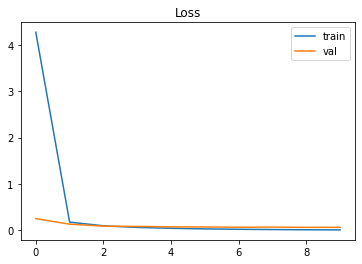

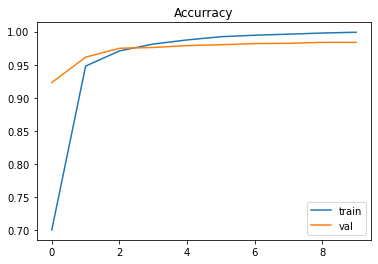

In [14]:
plt.plot(history_1_3.history['loss'], label='train')
plt.plot(history_1_3.history['val_loss'], label='val')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(history_1_3.history['accuracy'], label='train')
plt.plot(history_1_3.history['val_accuracy'], label='val')
plt.title('Accurracy')
plt.legend()
plt.show()

En este caso vemos que en los primeros dos epochs el modelo alcanza reultados bastante mejores, aunque cada epoch tuvo un tiempo de ejecucion mucho mayor. Vemos que incluso seguia creciendo ligeraemtne cuando lo detuvimos en 10 epochs, por lo que con mucho mas tiempo de entreneamiento puede que este modelo haya mejorado aun más. Aún así se obtuvo un accuracy bastante alto de 0.98 aproximadamente.

In [15]:
results[1] = model_1_3.evaluate(X_test.values.reshape(-1, 28, 28, 1), Y_test, verbose=0)[1]
print('train accuracy:', history_1_3.history['accuracy'][-1])
print('validation accuracy:', history_1_3.history['val_accuracy'][-1])
print('test accuracy:', results[1])

train accuracy: 0.9988839030265808
validation accuracy: 0.9836309552192688
test accuracy: 0.9811905026435852


### 1.4. Gradient Boosting Trees

In [32]:
model_xgb = xgb.XGBClassifier(n_estimators=50)
model_1_4 = MultiOutputClassifier(model_xgb)

In [33]:
model_1_4.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None,
                                              reg_alpha=None, reg_lambda=None, ...))

In [34]:
Y_train_pred = model_1_4.predict(X_train)
Y_test_pred = model_1_4.predict(X_test)
results[2] = accuracy_score(Y_test, Y_test_pred)
print('train accuracy:', accuracy_score(Y_train, Y_train_pred))
print('test accuracy:', results[2])

train accuracy: 0.999375
test accuracy: 0.9373809523809524


### 1.5. Test Mejor Modelo

In [19]:
def process_image(image, name, plot_image=True):
    if plot_image:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')
        
    # La cambiamos a escala de grises
    image = image.mean(axis=2)
    
    # Utilizamos un threshold para que el fondo sea 100% blanco
    image[image >= 100] = 255
    
    # Invertimos los colores de la imagen.
    image = (-1) * (image - 255)
    
    # Cambiamos la imagen a ser 28x28 pixeles
    image = resize(image, (28, 28), mode='reflect')
    
    if plot_image:
        plt.subplot(1, 2, 2)
        plt.imshow(image, cmap='gray')
        plt.title("Processed Image")
        plt.axis('off')
        plt.tight_layout()
        plt.suptitle(name)
        plt.show()
    
    # Retornamos un array de 1 dimension 
    return image.flatten()

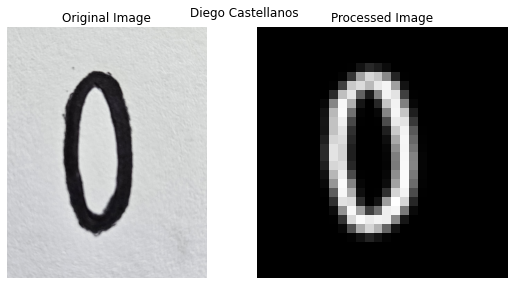

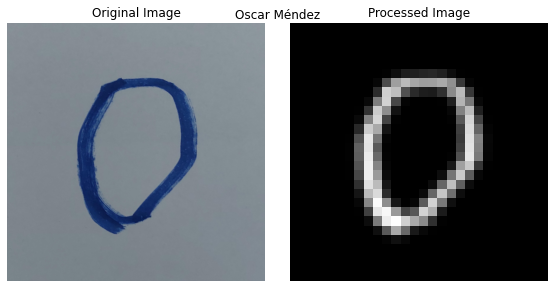

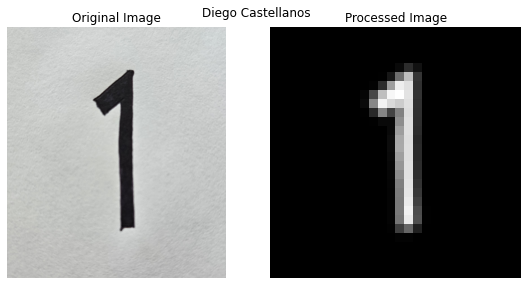

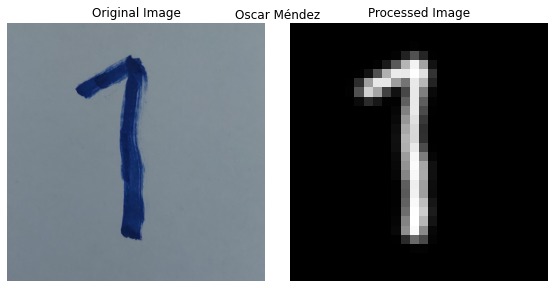

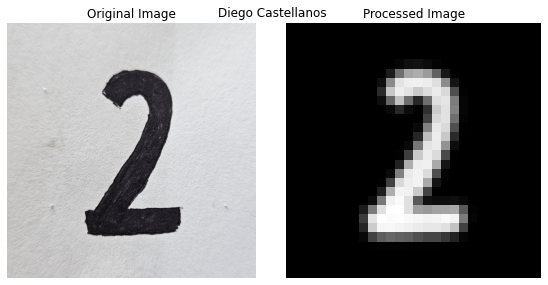

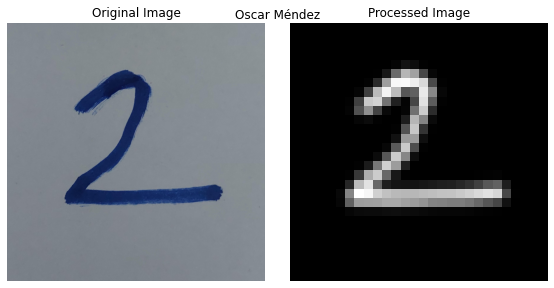

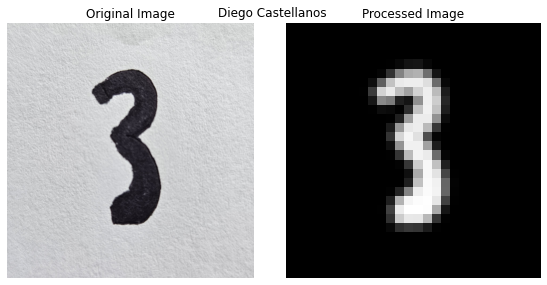

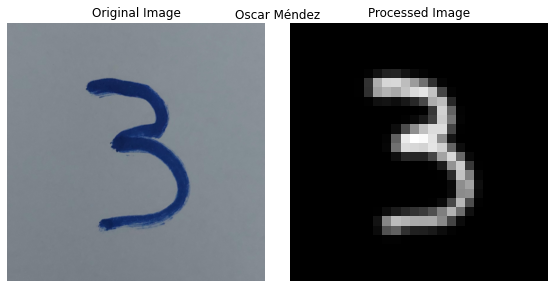

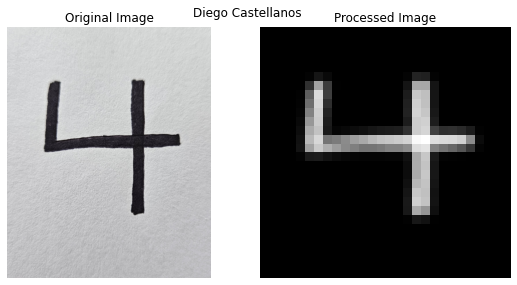

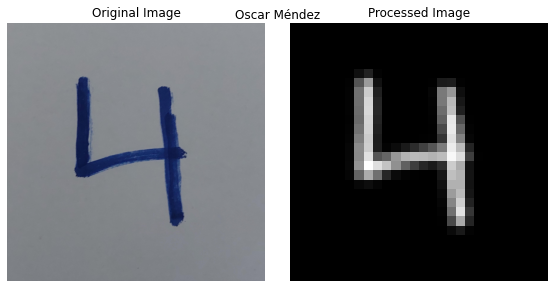

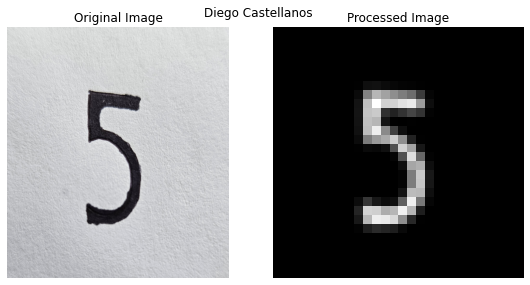

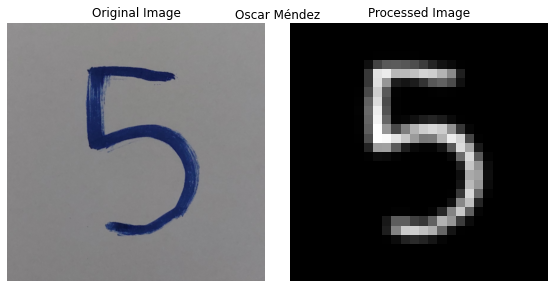

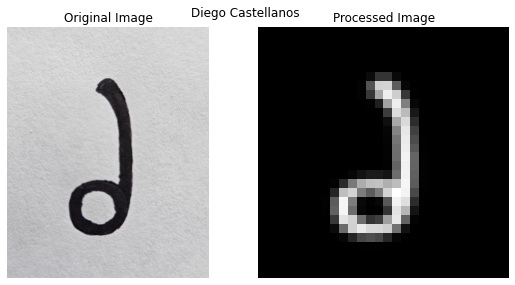

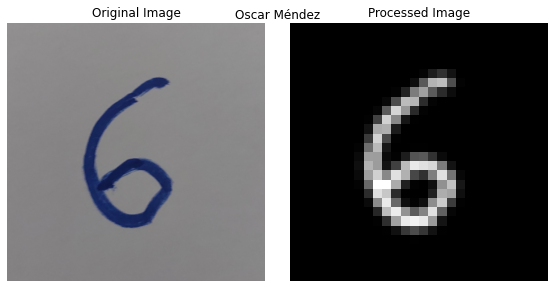

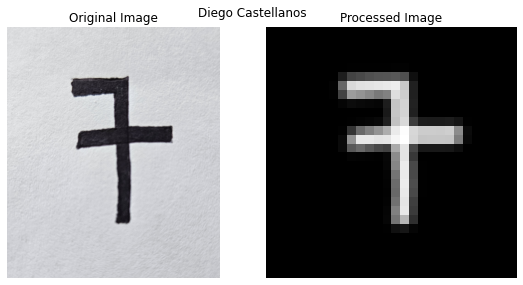

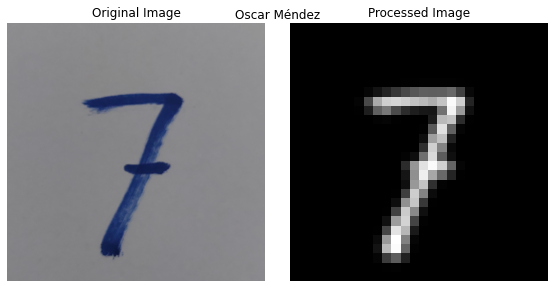

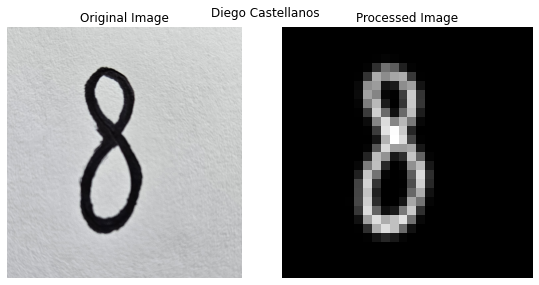

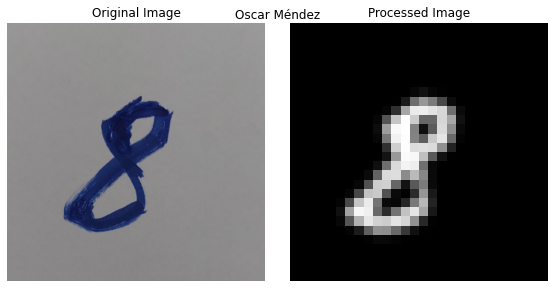

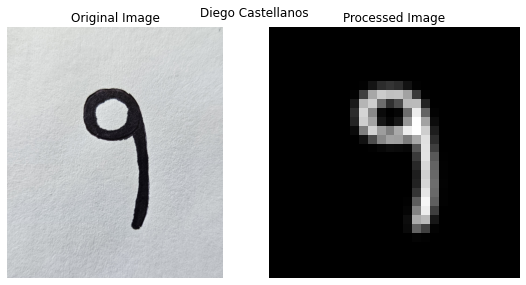

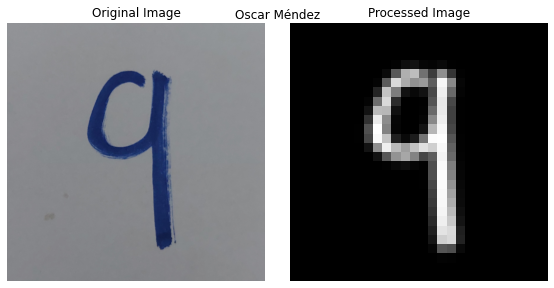

In [20]:
diego_digits = []
oscar_digits = []

for i in range(10):
    image = plt.imread('images/dc_' + str(i) + '.jpg')
    diego_digits.append((process_image(image, 'Diego Castellanos'), i))
    image = plt.imread('images/om_' + str(i) + '.jpg')
    oscar_digits.append((process_image(image, 'Oscar Méndez'), i))

In [21]:
combined_list = diego_digits + oscar_digits

data_dict = {
    'label': [item[1] for item in combined_list],
    **{f'px{i}': [item[0][i] for item in combined_list] for i in range(784)}
}

df_real = pd.DataFrame(data_dict)

df_real.head()

,label,px0,px1,px2,px3,px4,px5,px6,px7,px8,...,px774,px775,px776,px777,px778,px779,px780,px781,px782,px783
0,0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


train accuracy: 0.9988839030265808
validation accuracy: 0.9836309552192688
test accuracy: 0.9811905026435852
real test accuracy 0.85

Clasificadas incorrectamente:


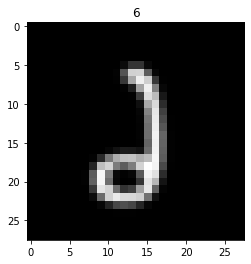

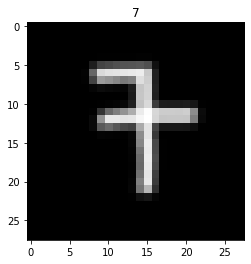

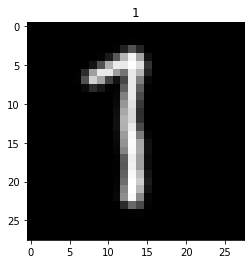

In [41]:
X_real_test = df_real.drop('label', axis=1)
Y_real_test = pd.get_dummies(df_real['label'])

Y_real_pred = model_1_3.predict(X_real_test.values.reshape(-1, 28, 28, 1), verbose=0)
Y_real_pred = (Y_real_pred >= 0.5).astype(int)

print('train accuracy:', history_1_3.history['accuracy'][-1])
print('validation accuracy:', history_1_3.history['val_accuracy'][-1])
print('test accuracy:', results[1])
print('real test accuracy', accuracy_score(Y_real_test, Y_real_pred))

Vemos que en la vida real el accuracy fue pero, aunque son muy pocos vaores como para generalizar. En la siguiente celda vemos que dígitos clasifico mal el modelo. Podemos ver que fue probablemente por ponerle palito al 7, especificamente fue el de Diego que donde la raya horizontal es bastante pronunciada.


Clasificadas incorrectamente:


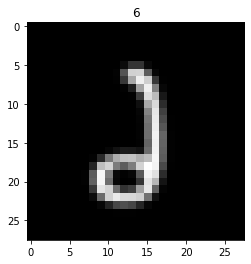

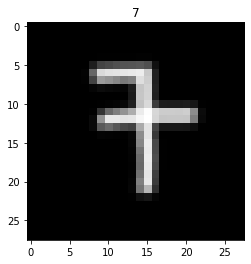

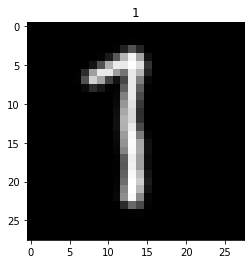

In [42]:
print('\nClasificadas incorrectamente:')
inc_labels = np.where(~np.all(Y_real_pred == Y_real_test, axis=1))[0]
for i in inc_labels:
    plt.imshow(X_real_test.loc[i, :].values.reshape((28, 28)), cmap='gray')
    plt.title(df_real.iloc[i, 0])
    plt.show()

### 1.6. Comparacion Modelos

In [23]:
df_results = pd.DataFrame({'modelos': ['Red Neuronal Simple', 'Deep Learning', 'Gradient Boosting Trees'],
                        'resultado': results
                       })
df_results

,modelos,resultado
0,Red Neuronal Simple,0.927738
1,Deep Learning,0.981191
2,Gradient Boosting Trees,0.949048


Como ya habiamos visto anteriormente la red neuronal de deep learning, obtuvo los mejores resultados en el test. Esto debido a que al usar una red convolucional vemos el contexto de cada pixel y no los vemos individualmente. El gradient boosted tree obtuvo un resultado parecido a la red neuronal simple, ya que estos tambien son bastante comletos a la hora de encotrar relaciones no lineales y generalizar resultados. A pesar de ello el de deep learning tuvo una clara diferencia alcanzando un 98% de los digitos clasificados correctamente. 

En el resultado real un numero no fue clasificado correctamente, que fue el numero 7 de Diego, si vemos la imagen es muy probable que haya sido por haberle puesto una raya horizontal n medio muy larga, y el dataset no traia los numeros 7 de esta forma. Es por esta razon que es de suma importancia tener datos de entrenamiento lo mas generalizados posibles y con mayor variedad. 

## Ejercicio 2

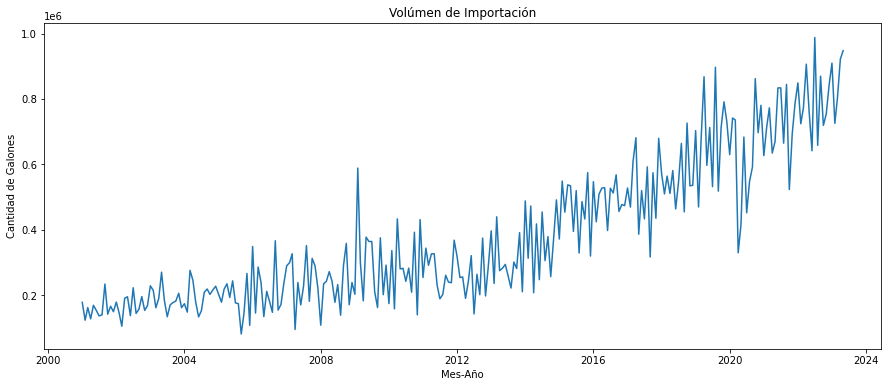

In [99]:
imp = pd.read_excel('IMPORTACION-VOLUMEN-2023-05.xlsx', sheet_name='IMPORTACION',skiprows = 6,
                            nrows=270, header=0,usecols= 'A, G, I, K, L, U', engine='openpyxl').dropna()
imp.set_index('Fecha', inplace=True)

imp = imp[['Gasolina regular']]
plt.figure(figsize=(15,6))
plt.plot(imp)
plt.gca().set(title="Volúmen de Importación", xlabel="Mes-Año", ylabel="Cantidad de Galones")
plt.show()

In [100]:
imp_train = imp[:'2019-12-01']
imp_test = imp['2021-01-01':]

Dividimos nuestra serie de tiempo en train y test. Para ello evadimo utilizar los datos del 2020, ya que este es un año atípico que puede meter ruido al modelo. Lo entrenaremos con todos los datos hasta diciembre de 2019, y lo testearemos todos los datos desde enero de 2021 hasta mayo de 2023.

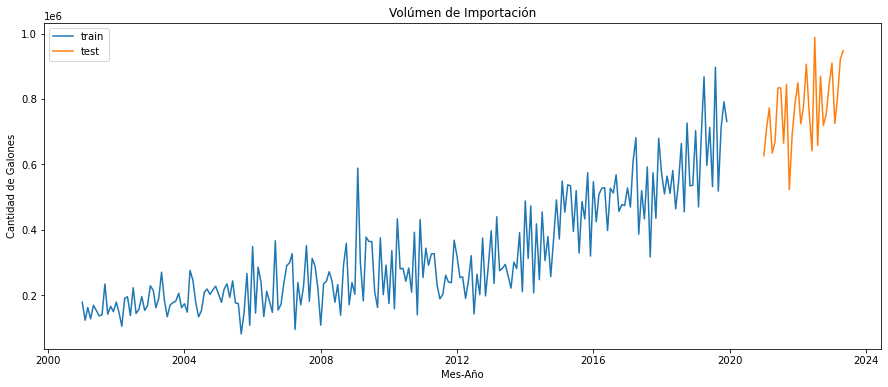

In [101]:
plt.figure(figsize=(15,6))
plt.plot(imp_train, label='train')
plt.plot(imp_test, label='test')
plt.legend()
plt.gca().set(title="Volúmen de Importación", xlabel="Mes-Año", ylabel="Cantidad de Galones")
plt.show()

### 2.2. Modelos LSTM

In [102]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(imp, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba          1.090748
p-value                        0.995137
# de retardos usados           9.000000
# de observaciones usadas    259.000000
Critical Value (1%)           -3.455853
Critical Value (5%)           -2.872765
Critical Value (10%)          -2.572752
dtype: float64


In [103]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
imp_diff = imp.diff()
imp_diff.fillna(0,inplace=True)
dfTest = adfuller(imp_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -9.869796e+00
p-value                      4.023147e-17
# de retardos usados         8.000000e+00
# de observaciones usadas    2.600000e+02
Critical Value (1%)         -3.455754e+00
Critical Value (5%)         -2.872721e+00
Critical Value (10%)        -2.572728e+00
dtype: float64


In [104]:
scaler = StandardScaler()
imp_diff_scaled = scaler.fit_transform(imp_diff) 
imp_diff_scaled[1:7]

array([[-0.42402829],
       [ 0.26352118],
       [-0.27458653],
       [ 0.28402156],
       [-0.13779616],
       [-0.14346383]])

In [128]:
imp_train = imp_diff_scaled[:-53]
imp_val = imp_diff_scaled[-53:-41]
imp_test = imp_diff_scaled[-29:]

imp_train=np.insert(imp_train,0,0)
imp_train=np.reshape(imp_train,(imp_train.shape[0],1))

len(imp_train), len(imp_val), len(imp_test)

(217, 12, 29)

In [129]:
from operator import concat

def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(imp_train)
x_val,y_val = supervisada(imp_val)
x_test,y_test = supervisada(imp_test)

In [130]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

11

#### Modelo 1

In [137]:
modelo_2_1 = Sequential()
lote = 1
unidades =  1
paso = 1
caracteristicas = 1 #es univariada
modelo_2_1.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo_2_1.add(Dense(1))

In [138]:
modelo_2_1.compile(loss='mean_squared_error',optimizer="adam")
history_2_1 = modelo_2_1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = 100,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3625 - val_loss: 1.3726
Epoch 2/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3605 - val_loss: 1.3686
Epoch 3/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3601 - val_loss: 1.3651
Epoch 4/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 1.3618
Epoch 5/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3595 - val_loss: 1.3585
Epoch 6/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3592 - val_loss: 1.3552
Epoch 7/100
216/216 [==============================] - 0s 2ms/step - loss: 0.3589 - val_loss: 1.3520
Epoch 8/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3586 - val_loss: 1.3488
Epoch 9/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 1.3457
Epoch 10/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3581 - val_lo

216/216 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 1.2176
Epoch 82/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 1.2168
Epoch 83/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3471 - val_loss: 1.2159
Epoch 84/100
216/216 [==============================] - 1s 3ms/step - loss: 0.3470 - val_loss: 1.2151
Epoch 85/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3470 - val_loss: 1.2143
Epoch 86/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3469 - val_loss: 1.2136
Epoch 87/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3468 - val_loss: 1.2128
Epoch 88/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3468 - val_loss: 1.2121
Epoch 89/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3467 - val_loss: 1.2113
Epoch 90/100
216/216 [==============================] - 1s 2ms/step - loss: 0.3467 - val_loss: 

In [139]:
print("Pérdida en Entrenamiento")
modelo_2_1.evaluate(
    x = x_train,
    y = y_train
)
print("Pérdida en Validación")
modelo_2_1.evaluate(
    x = x_val,
    y = y_val
)
print("Pérdida en Prueba")
modelo_2_1.evaluate(
    x = x_test,
    y = y_test
)

Pérdida en Entrenamiento
7/7 [==============================] - 0s 3ms/step - loss: 0.8084
Pérdida en Validación
1/1 [==============================] - 0s 26ms/step - loss: 2.9726
Pérdida en Prueba
1/1 [==============================] - 0s 22ms/step - loss: 1.3539


1.3539047241210938

#### Modelo 2

In [181]:
modelo_2_2 = Sequential()
lote = 1
unidades =  1
paso = 1
caracteristicas = 1
modelo_2_2.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas), stateful=True))
modelo_2_2.add(Dense(10, activation='relu'))
modelo_2_2.add(Dense(1))

In [182]:
modelo_2_2.compile(loss='mean_squared_error',optimizer="adam")
history_2_2 = modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = 20,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/20
216/216 [==============================] - 1s 3ms/step - loss: 0.3441 - val_loss: 1.1422
Epoch 2/20
216/216 [==============================] - 0s 2ms/step - loss: 0.3441 - val_loss: 1.1422
Epoch 3/20
216/216 [==============================] - 1s 2ms/step - loss: 0.3441 - val_loss: 1.1421
Epoch 4/20
216/216 [==============================] - 1s 2ms/step - loss: 0.3441 - val_loss: 1.1421
Epoch 5/20
216/216 [==============================] - 0s 2ms/step - loss: 0.3441 - val_loss: 1.1420
Epoch 6/20
216/216 [==============================] - 0s 2ms/step - loss: 0.3441 - val_loss: 1.1420
Epoch 7/20
216/216 [==============================] - 0s 2ms/step - loss: 0.3441 - val_loss: 1.1419
Epoch 8/20
216/216 [==============================] - 0s 2ms/step - loss: 0.3441 - val_loss: 1.1419
Epoch 9/20
216/216 [==============================] - 0s 2ms/step - loss: 0.3441 - val_loss: 1.1418
Epoch 10/20
216/216 [==============================] - 1s 2ms/step - loss: 0.3441 - val_loss: 1.1418

In [183]:
print("Pérdida en Entrenamiento")
modelo_2_2.evaluate(
    x = x_train,
    y = y_train
)
print("Pérdida en Validación")
modelo_2_2.evaluate(
    x = x_val,
    y = y_val
)
print("Pérdida en Prueba")
modelo_2_2.evaluate(
    x = x_test,
    y = y_test
)

Pérdida en Entrenamiento
7/7 [==============================] - 0s 2ms/step - loss: 0.8007
Pérdida en Validación
1/1 [==============================] - 0s 24ms/step - loss: 2.8561
Pérdida en Prueba
1/1 [==============================] - 0s 23ms/step - loss: 1.3575


1.357531189918518

En ambos modelos no vemos una diferencia significativa, pero el segundo le fue ligeramente mejor, demostranod que agregarle capas densas entre la lstm y el resultado final no aporta mucho al modelo.

### 2.3. Resultados